# Wine Quality Dataset

## Dataset Description

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

___________________________________________________________

Este quadro de dados contém as seguintes colunas:

Variáveis de entrada (com base em testes físico-químicos):\
1 - acidez fixa\
2 - acidez volátil\
3 - ácido cítrico\
4 - açúcar residual\
5 - cloretos\
6 - dióxido de enxofre livre\
7 - dióxido de enxofre total\
8 - densidade\
9 - pH\
10 - sulfatos\
11 - álcool\
Variável de saída (com base em dados sensoriais):\
12 - qualidade (pontuação entre 0 e 10)


## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.figure(figsize =(11, 6))
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Load Data

In [2]:
data = pd.read_csv('WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Checagem de valores nulos
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
# Renomeando as colunas
data.columns = ['acidez_fixa', 'acidez_volatil','acido_citrico', 'acucar_residual', 'cloretos', 'dioxido_enxofre_livre',
                'dioxido_enxofre_total', 'densidade', 'pH', 'sulfatos', 'alcool', 'qualidade', 'id']

data.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Removendo a coluna id
data = data.drop(columns='id')

## Data Description

In [6]:
# Número de Registros
data.shape

(1143, 12)

In [7]:
# Tipagem dos dados
data.dtypes

acidez_fixa              float64
acidez_volatil           float64
acido_citrico            float64
acucar_residual          float64
cloretos                 float64
dioxido_enxofre_livre    float64
dioxido_enxofre_total    float64
densidade                float64
pH                       float64
sulfatos                 float64
alcool                   float64
qualidade                  int64
dtype: object

In [8]:
# Tabela de frequência da variável Target
data['qualidade'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: qualidade, dtype: int64

In [9]:
# Estatística Descritiva
data.describe().T

,count,mean,std,min,25%,50%,75%,max
acidez_fixa,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
acidez_volatil,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
acido_citrico,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
acucar_residual,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
cloretos,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
dioxido_enxofre_livre,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
dioxido_enxofre_total,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
densidade,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulfatos,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


## Data Visualization 

<AxesSubplot:xlabel='qualidade', ylabel='count'>

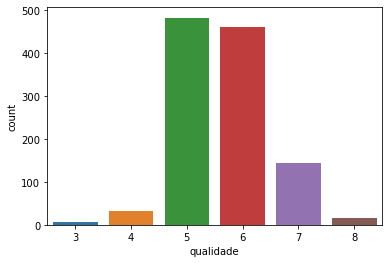

In [10]:
# Gráfico de Barras da Variável Target
sns.countplot(data['qualidade'])

array([[<AxesSubplot:title={'center':'acidez_fixa'}>,
        <AxesSubplot:title={'center':'acidez_volatil'}>,
        <AxesSubplot:title={'center':'acido_citrico'}>],
       [<AxesSubplot:title={'center':'acucar_residual'}>,
        <AxesSubplot:title={'center':'cloretos'}>,
        <AxesSubplot:title={'center':'dioxido_enxofre_livre'}>],
       [<AxesSubplot:title={'center':'dioxido_enxofre_total'}>,
        <AxesSubplot:title={'center':'densidade'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulfatos'}>,
        <AxesSubplot:title={'center':'alcool'}>,
        <AxesSubplot:title={'center':'qualidade'}>]], dtype=object)

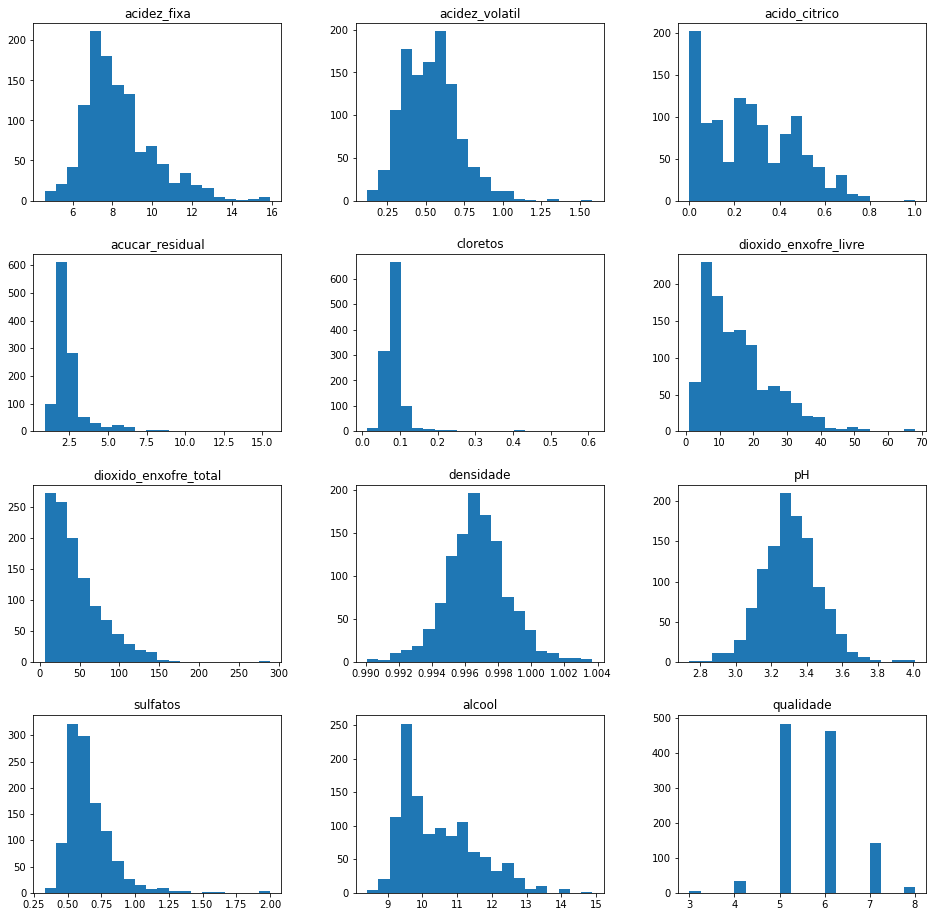

In [11]:
# Histograma das distribuições de frequência de cada variável
data.hist(bins=20, grid=False, figsize=(16,16))

<AxesSubplot:>

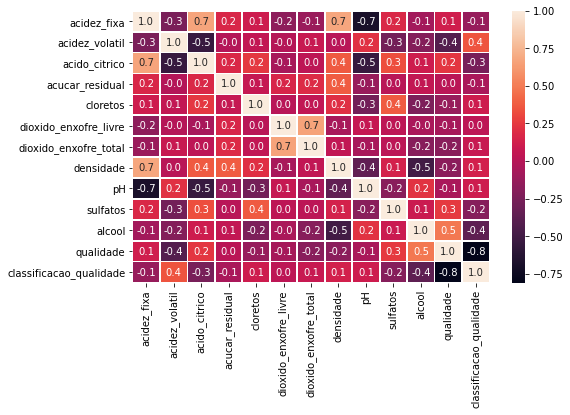

In [32]:
# Análise de Correlação entre as variáveis
correlation = data.corr()
plt.subplots(figsize=(8,5))
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.7)
plot

Através do mapa de calor que mostra a correlação entre as variáveis, é possível observar que existe uma correlação fortemente negativa entre as variáveis "pH" e "acidez fixa" e uma correlação fortemente positiva entra as variáveis "acidez fixa" e "densidade".

<AxesSubplot:xlabel='acidez_fixa', ylabel='pH'>

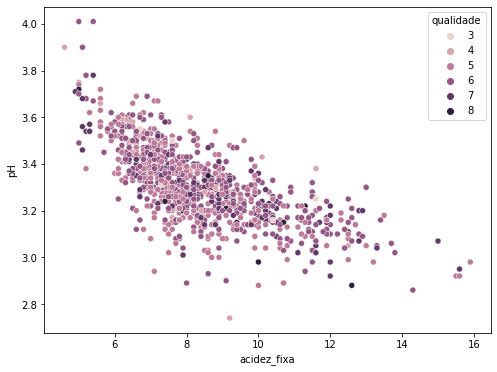

In [13]:
# Gráfico de dispersão confirmando a correlação negativa entre pH e acidez fixa
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='acidez_fixa', y='pH', hue='qualidade')

<AxesSubplot:xlabel='acidez_fixa', ylabel='densidade'>

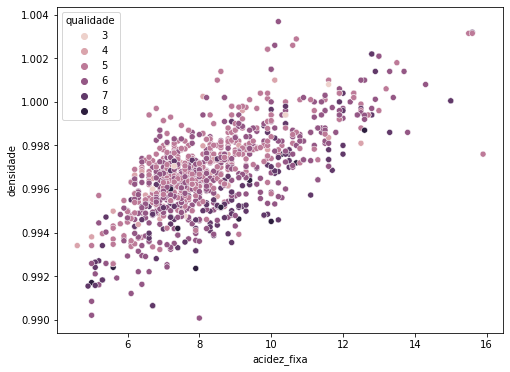

In [14]:
# Gráfico de dispersão confirmando a correlação positiva entre pH e acidez fixa
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='acidez_fixa', y='densidade', hue='qualidade')

Como a variável target apresenta uma distribuição normal, o desvio padrão entre 0 e 1 e, média e mediana apresentando valores próximos (pouco mais de 5% de diferença), utilizarei a média e a mediana para separar os vinhos em: bom, razoável e ruim.  Vinhos que apresentam qualidade abaixo de 5 serão classificados como ruins; qualidade 5 ou 6 como razoáveis e maiores que 6 como bons vinhos.

In [15]:
# Criando uma coluna para classificar os vinhos de acordo com a nota dada
data["classificacao_qualidade"] = data['qualidade'].apply(lambda x: 'ruim' if x < 5 else
                                                                    'razoável' if (x==5 or x==6)
                                                                     else 'bom')

In [16]:
data.head(10)

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,classificacao_qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,razoável
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,razoável
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,razoável
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,razoável
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,razoável
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,razoável
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,razoável
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,bom
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,bom
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,razoável


In [17]:
data['classificacao_qualidade'].value_counts()

razoável    945
bom         159
ruim         39
Name: classificacao_qualidade, dtype: int64

In [18]:
# Utilizando o método LabelEncoder() do sklearn para transformar a classificação categórica em numérica
lenc = LabelEncoder()
classificacao = lenc.fit_transform(data['classificacao_qualidade'])
data['classificacao_qualidade'] = classificacao

In [19]:
data.classificacao_qualidade.value_counts()

1    945
0    159
2     39
Name: classificacao_qualidade, dtype: int64

In [20]:
data.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfatos,alcool,qualidade,classificacao_qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Após aplicação do método LabelEncoder() os vinhos foram classificados da seguinte forma:
- 0: bom
- 1: razoável
- 2: ruim

## Data Pre-Processing

In [21]:
# Separação das variáveis de entrada e target
X = data.iloc[:,:-2].values
y = data.iloc[:,-1].values

print("\nVariáveis de Entrada: \n\n", X[:5])
print('\nQualidade - Target: \n\n', y[:5])


Variáveis de Entrada: 

 [[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]

Qualidade - Target: 

 [1 1 1 1 1]


In [22]:
# Separação dos dados entre Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [23]:
print("Dados de Treino: \n-------------------\n")
print("X = \n", X_train[:5])
print("y = \n", y_train[:5])

print("Dados de Teste: \n-------------------\n")
print("X = \n", X_test[:5])
print("y = \n", y_test[:5])

Dados de Treino: 
-------------------

X = 
 [[4.9000e+00 4.2000e-01 0.0000e+00 2.1000e+00 4.8000e-02 1.6000e+01
  4.2000e+01 9.9154e-01 3.7100e+00 7.4000e-01 1.4000e+01]
 [7.5000e+00 5.7000e-01 2.0000e-02 2.6000e+00 7.7000e-02 1.1000e+01
  3.5000e+01 9.9557e-01 3.3600e+00 6.2000e-01 1.0800e+01]
 [7.4000e+00 4.9000e-01 1.9000e-01 3.0000e+00 7.7000e-02 1.6000e+01
  3.7000e+01 9.9660e-01 3.3700e+00 5.1000e-01 1.0500e+01]
 [7.2000e+00 5.7000e-01 5.0000e-02 2.3000e+00 8.1000e-02 1.6000e+01
  3.6000e+01 9.9564e-01 3.3800e+00 6.0000e-01 1.0300e+01]
 [5.6000e+00 6.2000e-01 3.0000e-02 1.5000e+00 8.0000e-02 6.0000e+00
  1.3000e+01 9.9498e-01 3.6600e+00 6.2000e-01 1.0100e+01]]
y = 
 [0 1 1 1 2]
Dados de Teste: 
-------------------

X = 
 [[6.8000e+00 7.7500e-01 0.0000e+00 3.0000e+00 1.0200e-01 8.0000e+00
  2.3000e+01 9.9650e-01 3.4500e+00 5.6000e-01 1.0700e+01]
 [8.6000e+00 4.7000e-01 3.0000e-01 3.0000e+00 7.6000e-02 3.0000e+01
  1.3500e+02 9.9760e-01 3.3000e+00 5.3000e-01 9.4000e+00]
 [6.2000e+

In [24]:
# Normalização das variáveis
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("\n--------------------\nDados Padronizados\n--------------------\n")
print("\nX_train: \n", X_train[:5])
print("\nX_test: \n", X_test[:5])


--------------------
Dados Padronizados
--------------------


X_train: 
 [[-1.93833054 -0.62936312 -1.35370278 -0.32235696 -0.81447741  0.0229481
  -0.12911096 -2.6874288   2.53795656  0.46340949  3.26888685]
 [-0.45548382  0.2126271  -1.25239188  0.04068309 -0.21547404 -0.45751305
  -0.34009824 -0.60699881  0.30682684 -0.23136682  0.33063117]
 [-0.51251639 -0.23643435 -0.39124927  0.33111512 -0.21547404  0.0229481
  -0.27981616 -0.07527601  0.37057341 -0.8682451   0.0551697 ]
 [-0.62658152  0.2126271  -1.10042554 -0.17714094 -0.13285289  0.0229481
  -0.3099572  -0.57086231  0.43431997 -0.34716287 -0.12847128]
 [-1.53910258  0.49329051 -1.20173643 -0.75800501 -0.15350818 -0.93797419
  -1.00320111 -0.91157789  2.21922374 -0.23136682 -0.31211226]]

X_test: 
 [[-0.85471179  1.36334708 -1.35370278  0.33111512  0.30090817 -0.74578973
  -0.70179071 -0.12689958  0.88054591 -0.57875497  0.23881068]
 [ 0.17187441 -0.34869971  0.16596065  0.33111512 -0.23612933  1.3682393
   2.67400571  0.4409

# Predictive Model

O primeiro algoritmo de ML utilizado para tentar prever a qualidade do vinho com base nas suas caracterísiticas foi o KNN (K-Nearest Neighbors) que classifica os dados de acordo com a distância entre eles.

### KNN Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
predict = KNeighborsClassifier(n_neighbors=30)

In [26]:
# Treinando o Modelo
predict = predict.fit(X_train, y_train)

In [27]:
# Prevendo os resultados
y_pred = predict.predict(X_test)

print("Valores reais com dados de teste: \n", y_test[:10])

print("Valores preditos pelo Modelo: \n", y_pred[:10])

Valores reais com dados de teste: 
 [1 1 1 1 1 1 0 0 1 1]
Valores preditos pelo Modelo: 
 [1 1 1 1 1 1 1 0 1 1]


#### Model Evaluation

In [28]:
# Acurácia
print("Acurácia do Modelo: ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia do Modelo:  81.73913043478261


In [29]:
# Comparação Real x Predito
error_df = pd.DataFrame({"Real": y_test,
                        "Predito": y_pred})

error_df.head(10)

,Real,Predito
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,1
7,0,0
8,1,1
9,1,1


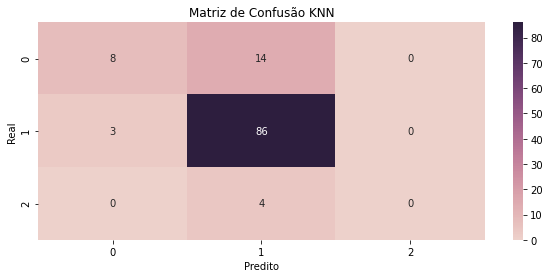

In [30]:
fig, ax1 = plt.subplots(1, figsize=(10,4))
 
cm1 = metrics.confusion_matrix(y_test,y_pred)
 
sns.heatmap(cm1, annot=True, fmt="d", ax=ax1, cmap=sns.cubehelix_palette(as_cmap=True))
 
ax1.set_title("Matriz de Confusão KNN")
ax1.set_xlabel("Predito")
ax1.set_ylabel("Real")

plt.show()

- 0: bom
- 1: razoável
- 2: ruim

In [31]:
# Cross Validation KNN
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["bom", "razoável", "ruim"]))

              precision    recall  f1-score   support

         bom       0.73      0.36      0.48        22
    razoável       0.83      0.97      0.89        89
        ruim       0.00      0.00      0.00         4

    accuracy                           0.82       115
   macro avg       0.52      0.44      0.46       115
weighted avg       0.78      0.82      0.78       115



Através da análise feita utilizando o KNN pude observar que apesar do algoritmo ter apresentado uma boa acurácia geral, pela matriz de confusão percebe-se que não foram feitas previsões para vinhos classificados como "ruins". Possivelmente, esse problema ocorreu em função do desbalanceamento gerado a partir da divisão em 3 classes, onde a classe "ruim" representou apenas 3,41% do total de registros do conjunto de dados.